In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load all the data
df_all = pd.concat(
    [pd.read_csv("download/train.csv"), pd.read_csv("download/test.csv")], axis=0
)
# df_all

Check for data types and missing values.

In [3]:
# df_all.info()

In [4]:
# list(set(df_all.dtypes.tolist()))

To visualize, we should separate the features by type, but some categorical features are ordinal (e.g., `LotShape`) and some numerical features are really categorical (e.g., `MSSubClass`).  

We take a closer look at `download/data_description.txt`, and also see that some of the missing values in fact do have given values that can be imputed (e.g., `Alley`).  We can do this on all the data at once without the danger of data leakage, since we are not training on any data for this imputation step.  Similarly, changing data types will not introduce data leakage.

In [5]:
# Actually categorical features
df_all[["Id", "MSSubClass", "MoSold"]] = df_all[["Id", "MSSubClass", "MoSold"]].astype(
    "O"
)
# df_all.info()

In [6]:
# Impute features with `NA`
na_impute_cols = [
    "Alley",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "MiscFeature",
]
na_impute = SimpleImputer(strategy="constant", fill_value="NA")
df_all[na_impute_cols] = na_impute.fit_transform(df_all[na_impute_cols])

# Ordinal features
ordinal_data = {
    "LotShape": {1: "IR3", 2: "IR2", 3: "IR1", 4: "Reg"},
    "LandSlope": {1: "Sev", 2: "Mod", 3: "Gtl"},
    "ExterQual": {1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "ExterCond": {1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "BsmtQual": {0: "NA", 1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "BsmtCond": {0: "NA", 1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "BsmtExposure": {0: "NA", 1: "No", 2: "Mn", 3: "Av", 4: "Gd"},
    "BsmtFinType1": {
        0: "NA",
        1: "Unf",
        2: "LwQ",
        3: "Rec",
        4: "BLQ",
        5: "ALQ",
        6: "GLQ",
    },
    "BsmtFinType2": {
        0: "NA",
        1: "Unf",
        2: "LwQ",
        3: "Rec",
        4: "BLQ",
        5: "ALQ",
        6: "GLQ",
    },
    "HeatingQC": {1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "KitchenQual": {1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "Functional": {
        1: "Sal",
        2: "Sev",
        3: "Maj2",
        4: "Maj1",
        5: "Mod",
        6: "Min2",
        7: "Min1",
        8: "Typ",
    },
    "FireplaceQu": {0: "NA", 1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "GarageFinish": {0: "NA", 1: "Unf", 2: "RFn", 3: "Fin"},
    "GarageQual": {0: "NA", 1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "GarageCond": {0: "NA", 1: "Po", 2: "Fa", 3: "TA", 4: "Gd", 5: "Ex"},
    "PavedDrive": {1: "N", 2: "P", 3: "Y"},
    "PoolQC": {0: "NA", 1: "Fa", 2: "TA", 3: "Gd", 4: "Ex"},
    "Fence": {0: "NA", 1: "MnWw", 2: "GdWo", 3: "MnPrv", 4: "GdPrv"},
}
for outer_key, outer_value in ordinal_data.items():
    for inner_key in outer_value:
        df_all[outer_key].replace(outer_value[inner_key], inner_key, inplace=True)

# Directly correlated features
df_all.loc[df_all["HouseStyle"] == "1Story", "2ndFlrSF"] = 0
df_all.loc[
    df_all["BsmtQual"] == 0,
    [
        "BsmtFinSF1",
        "BsmtFinSF2",
        "BsmtUnfSF",
        "TotalBsmtSF",
        "BsmtFullBath",
        "BsmtHalfBath",
    ],
] = 0
df_all.loc[df_all["GarageType"] == "NA", ["GarageCars", "GarageArea"]] = 0
df_all.loc[df_all["PoolQC"] == "NA", "PoolArea"] = 0

# df_all.info()

C:\Users\leyjf\AppData\Local\Temp\ipykernel_28240\1623223803.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all[outer_key].replace(outer_value[inner_key], inner_key, inplace=True)
C:\Users\leyjf\AppData\Local\Temp\ipykernel_28240\1623223803.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

Now separate by type and remove `Id` and `SalePrice` to see distributions.

In [7]:
# Numerical data
df_all_num = df_all.select_dtypes(include=["float64", "int64"])
df_all_num = df_all_num.drop(columns=["SalePrice"])
# df_all_num.info()

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'ExterCond'}>,
        <Axes: title={'center': 'BsmtQual'}>,
        <Axes: title={'center': 'BsmtCond'}>,
        <Axes: title={'center': 'BsmtExposure'}>],
       [<Axes: title={'center': 'BsmtFinType1'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinType2'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'Heating

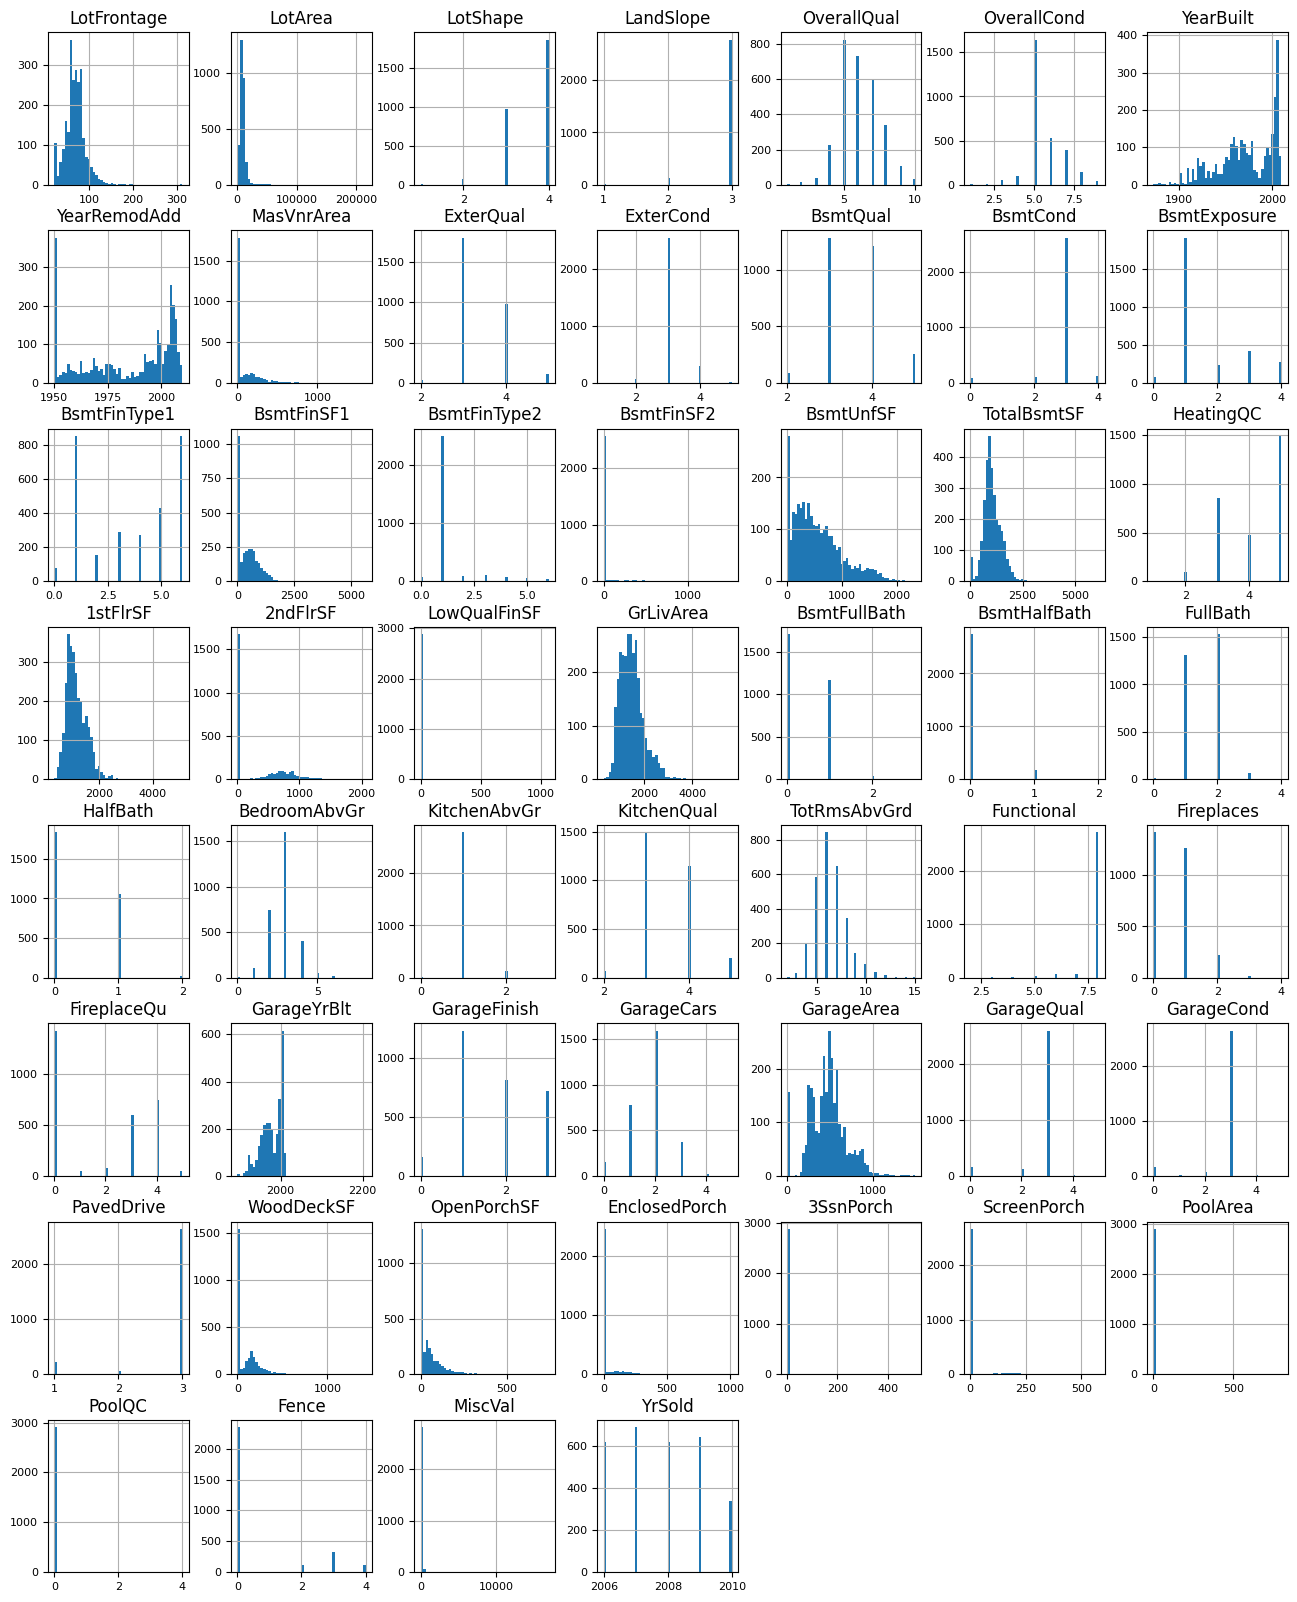

In [8]:
df_all_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [9]:
# Categorical data
df_all_cat = df_all.select_dtypes(include="O")
df_all_cat = df_all_cat.drop(columns=["Id"])

# Fill in the remaining missing categorical data with `Unknown`` and update df_all
uk_impute = SimpleImputer(strategy="constant", fill_value="Unknown")
df_all_cat = pd.DataFrame(
    uk_impute.fit_transform(df_all_cat), columns=df_all_cat.columns.tolist()
)
cat_cols = df_all_cat.columns.to_list()
df_all[cat_cols] = df_all_cat

# df_all_cat.info()

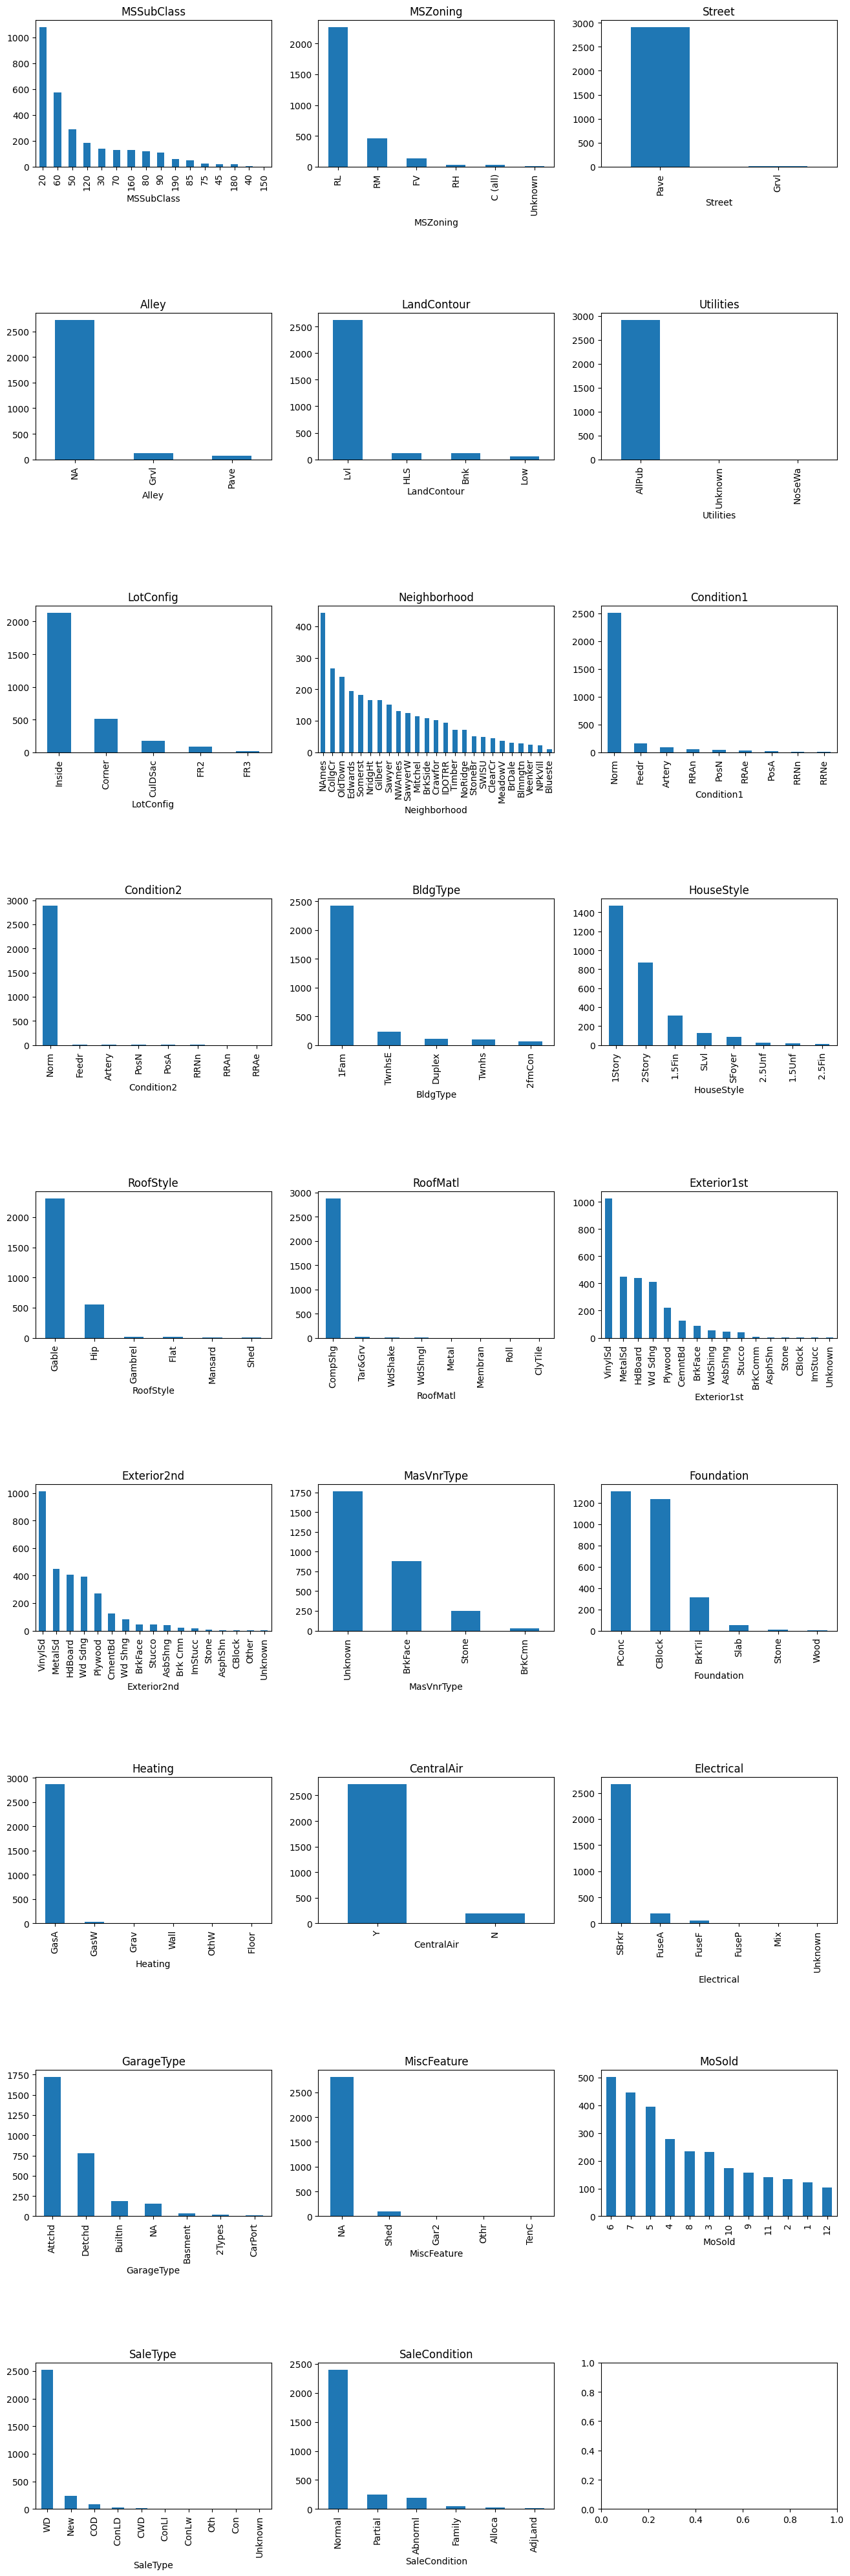

In [10]:
fig, axes = plt.subplots(9, 3, figsize=(16, 50))  # 15, 3, figsize=(16, 50))
axes = axes.ravel()
for i, col in enumerate(df_all_cat.columns):
    df_all_cat[col].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(col)
plt.subplots_adjust(hspace=1)
plt.show()

Plot each feature in the training data against `SalePrice`.

In [11]:
# Recover the training data
df_train = df_all.head(1460)
# df_train

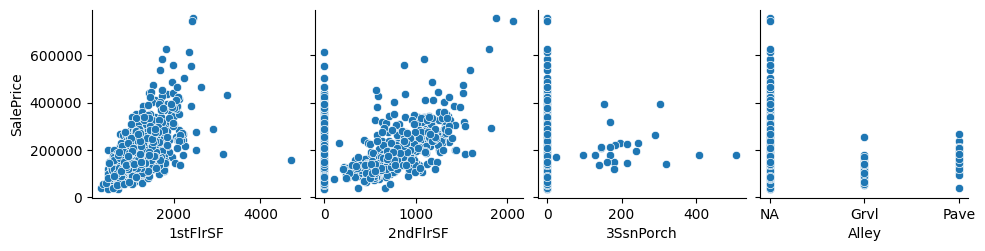

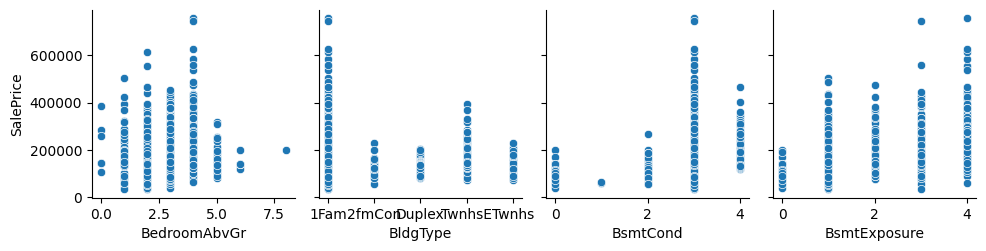

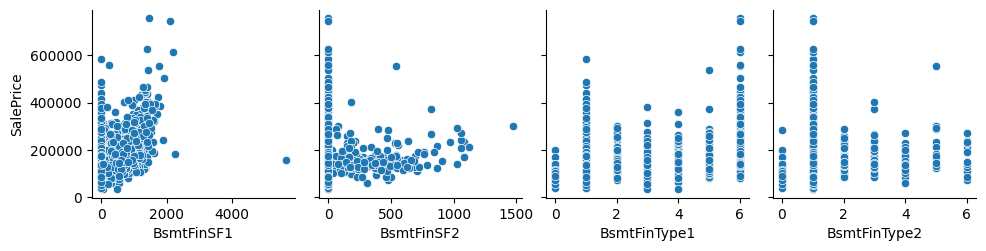

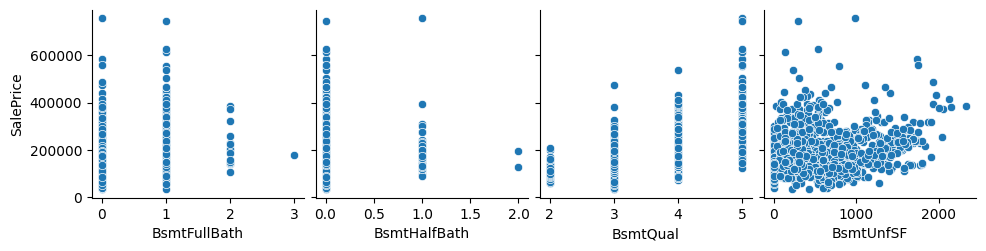

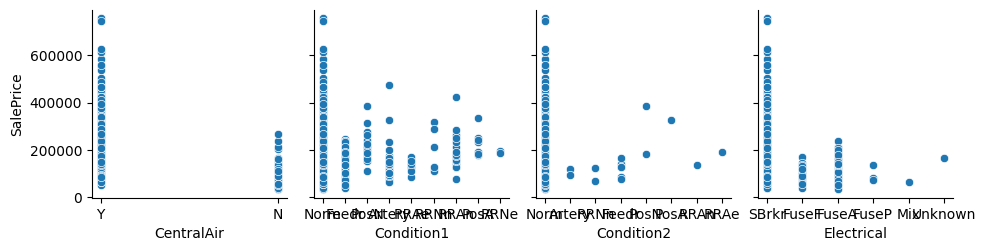

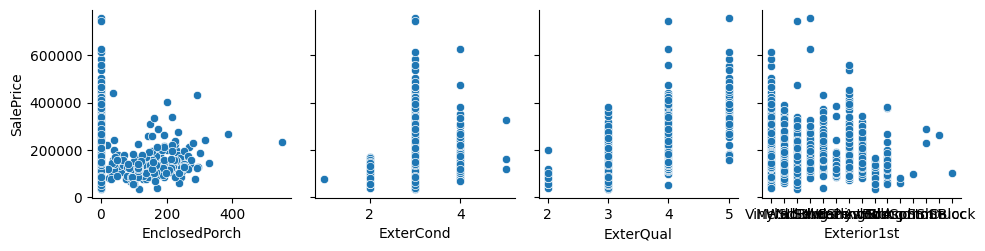

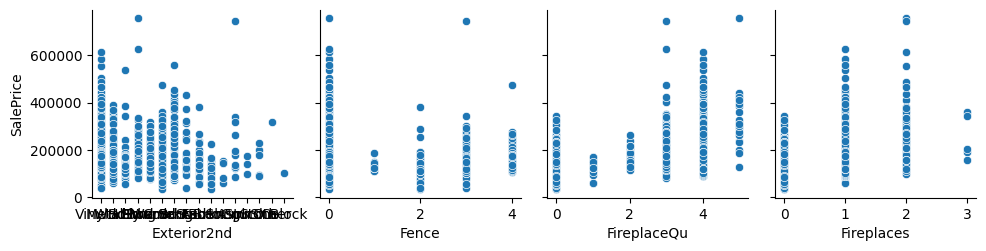

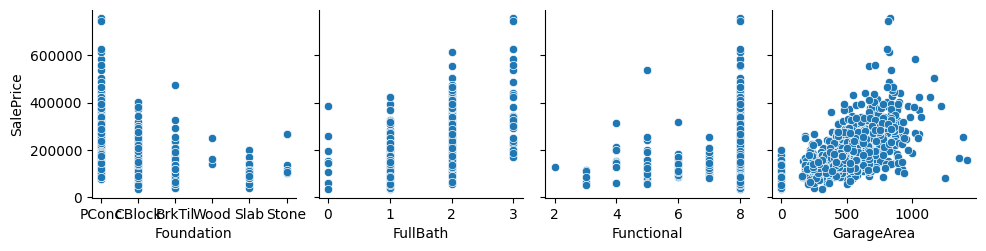

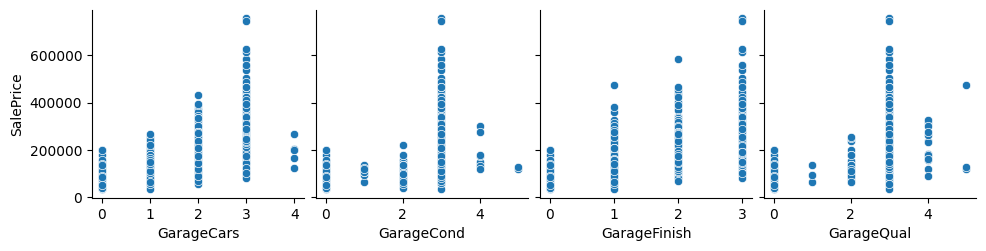

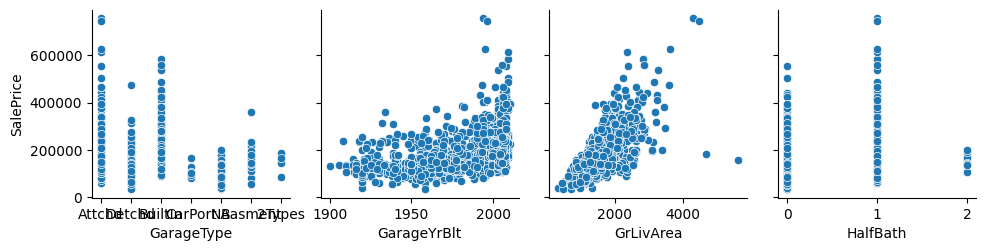

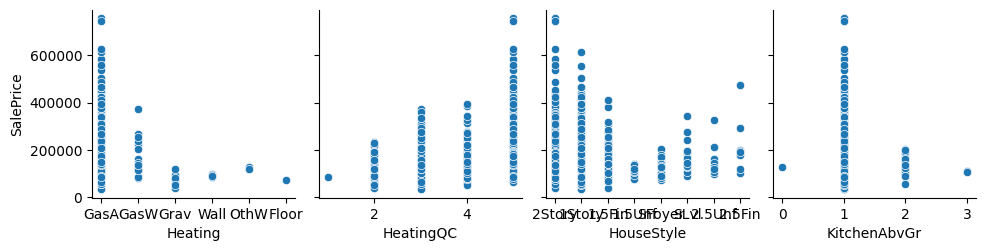

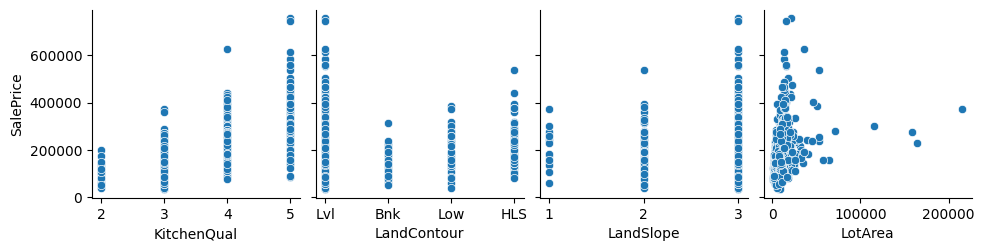

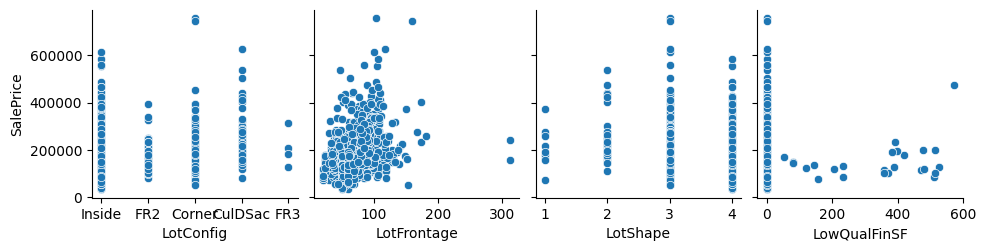

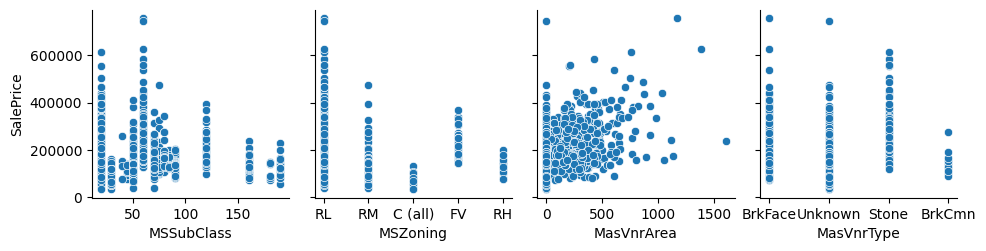

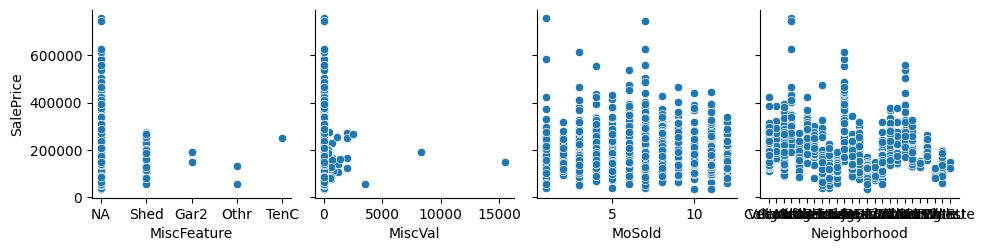

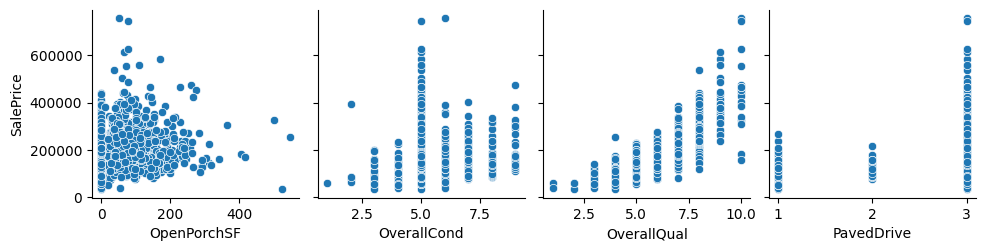

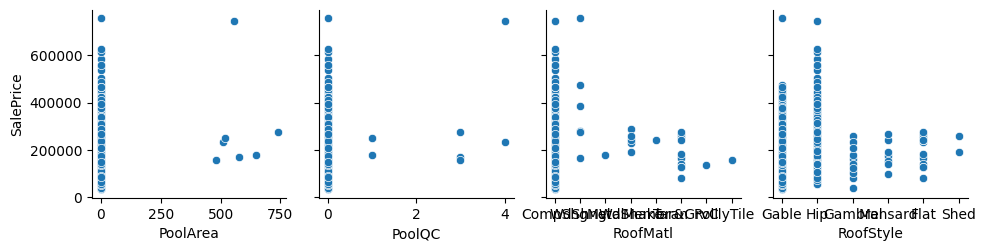

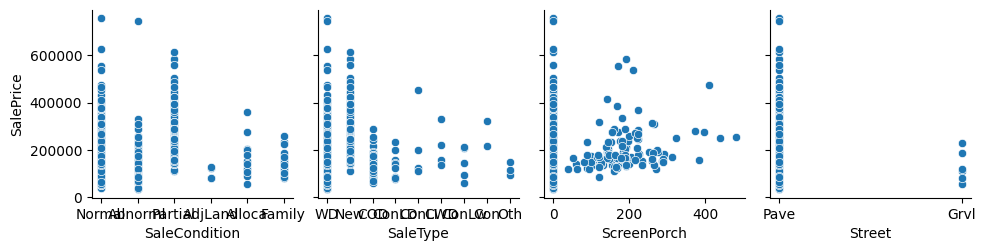

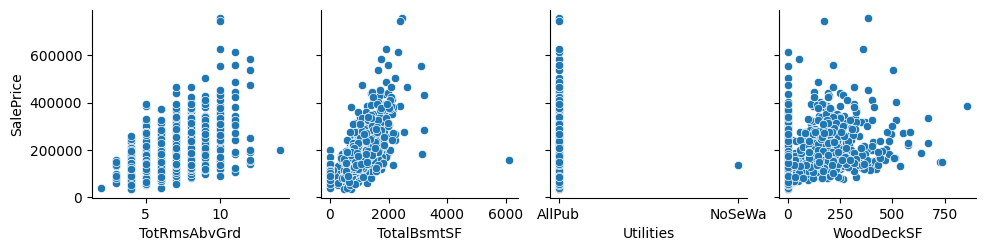

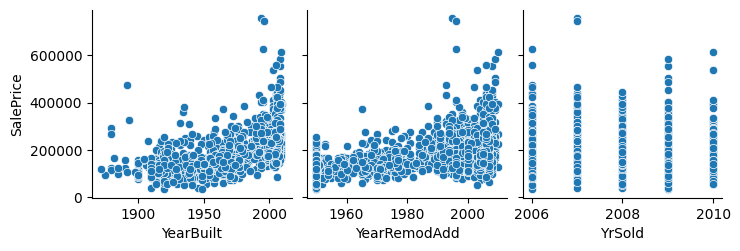

In [12]:
x_vars = df_train.columns.difference(["Id", "SalePrice"])
for i in range(20):
    sns.pairplot(df_train, x_vars=x_vars[4 * i : 4 * i + 4], y_vars=["SalePrice"])

Check the distribution of `SalePrice`.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


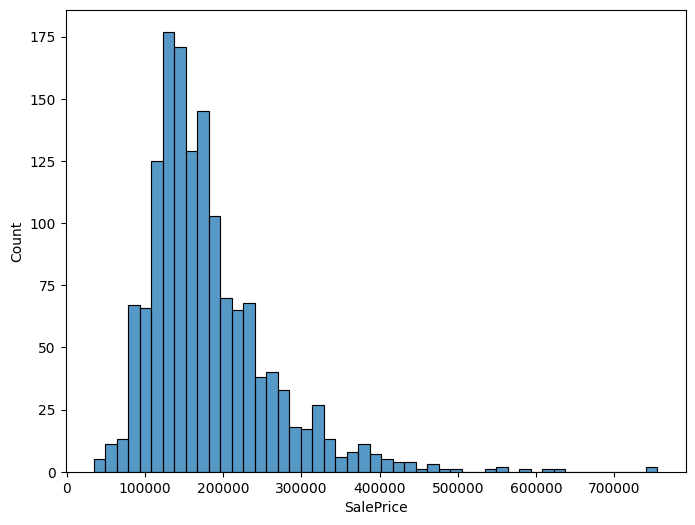

In [13]:
print(df_train["SalePrice"].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df_train["SalePrice"])

Save the modified data for preprocessing.

In [14]:
df_test = df_all.tail(1459)
# df_test

In [15]:
# Save to file with the changed data types to load in the next ipynb file
df_train.to_csv("raw_data/exp_train.csv", index=False)
df_test.to_csv("raw_data/exp_test.csv", index=False)
dtypes = {}
for column in df_train.columns.to_list():
    type = str(df_train.dtypes[column])
    type = type.replace("(", "*(")
    type = type.replace(")", ")*")
    dtypes[column] = type
with open("raw_data/dtypes.json", "w") as file:
    json.dump(dtypes, file)